# 7. 가설과 추론 Hypothesis and Inference

## 통계적 가설 검정 Statistical Hypothesis Testing

: 가설을 검정하기 위해 통계적인 방법과 테스트를 사용하는 과정

- 이를 통해 표본 데이터를 분석하여 가설을 지지하거나 기각하는 결론을 도출
- 통계적 가설 검정의 개념
    - 주로 두 가지 가설을 비교하고 검증하는 데 사용함.
        - 귀무가설(H0): 일반적으로 "차이가 없다"라는 가설로 설정하는 경우가 많음
        - 대립가설(H1): 귀무 가설과 반대되는 가설로 설정
    - 통계를 사용하여 표본 데이터를 분석하여 귀무가설이 기각되거나 기각되지 않는지(H0가 거짓으로 거부할 수 있는지 여부)를 결정
    - 귀무가설을 굳이 도입하는 이유
        - 참이 아님을 증명하는 것이 참임을 증명하는 것보다 쉽기 때문이다.
        - 귀무가설을 올바르게 서술하는 것이 대립가설을 정확하게 서술하는 것보다 실패할 가능성이 적다.
        - 우리는 모수에 대해 알 수 없으며, 연구에 있어서 주관성이 개입되어선 안 되기 때문이다.
        - 하지만, 가설 검증은 귀무가설 기각으로만 가능한 것이 아님
            - 귀류법과 비슷함.
                - 귀류법: 어떤 명제를 간접적으로 증명하는 방법
                    - 어떤 명제가 참이라고 직접 증명하기 어려우므로 그 부정이 참이라고 가정한 뒤 증명을 해나가다가 모순을 발견하고 이를 통해 해당 명제를 증명하는 것
                    - 조사나 연구에서 어떤 변화가 있다는 가설을 검증하고자 한다면 역으로 가설이 없다고 가정한 뒤 실험을 진행한다.
                    - 그런 다음 변화가 없다는 가설에 모순이 있다는 것을 발견하게 될 수만 있다면 이것을 근거로 변화가 있다는 사실을 간접적으로 증명할 수 있게 되는 것
    - 이를 위해 통계적 가설 검정 방법을 사용하며, 검정 통계량과 유의수준 등의 요소를 활용하여 결론을 도출

In [1]:
import numpy as np
from scipy import stats

#예시 데이터 생성
data = np.array([3, 4, 6, 8, 9, 10])

#단일 표본 t-검정 예시
#귀무 가설(H0): 평균이 5인 경우
#대립 가설(H1): 평균이 5가 아닌 경우

#t-검정 실행
t_statistic, p_value = stats.ttest_1samp(data, 5)

#유의수준 설정(일반적으로 0.05 사용)
alpha = 0.05

#p-value와 유의수준을 비교하여 검정 결과 도출
if p_value < alpha:
    print("귀무가설 기각. 대립가설 채택")
else:
    print("귀무가설 채택")

#결과 출력
print("t-statistic:", t_statistic)
print("p-value:", p_value)

귀무가설 채택
t-statistic: 1.4555562743489552
p-value: 0.2052815052287263


▲ 단일 표본 t-검정 예시

주어진 데이터 'data'를 대상으로 평균이 5와 다른지 검정.

'ttest_1samp()' 함수는 t-검정을 실행하고, 't_statistic'과 'p_value'를 반환.

이후 'p_value'와 미리 설정한 유의수준 'alpha'를 비교하여 검정 결과 출력

In [4]:
import numpy as np
from scipy import stats

#예시 데이터 생성
np.random.seed(0)
sample1 = np.random.normal(loc = 10, scale = 2, size = 100)
sample2 = np.random.normal(loc = 10, scale = 2, size = 100)

#독립표본 t-검정 실행
#귀무 가설(H0): 두 표본의 평균이 동일하다
#대립 가설(H1): 두 표본의 평균이 동일하지 않다

t_statistic, p_value = stats.ttest_ind(sample1, sample2)

#유의수준 설정(일반적으로 0.05)
alpha = 0.05

#p-value와 유의수준을 비교하여 검정 결과 도출
if p_value < alpha:
    print("귀무 가설 기각. 대립 가설 채택")
else:
    print("귀무 가설 채택")
    
#결과 도출
print("t-Statistic:", t_statistic)
print("p-value:", p_value)

귀무 가설 채택
t-Statistic: -0.15295815048595499
p-value: 0.8785870431170584


▲ 두 개의 독립적인 표본을 비교하는 독립 표본 t-검정

numpy의 'random.normal()'함수를 사용하여 두 개의 독립적인 정규 분포를 따르는 표본 데이터 'sample1'과 sample2'를 생성.

그 후, 'ttest_ind()' 함수를 사용하여 독립표본 t-검정을 실행하고, 't_statistic'과 'p_value'를 계산.

'p_value'와 미리 설정한 유의수준 'alpha'를 비교하여 검정 결과를 출력

### 유의수준 alpha를 0.05로 설정하는 이유

1. 통계적 신뢰성
    - alpha 값이 작을수록 귀무 가설을 기각하는 기준이 더 높아짐 -> 통계적 신뢰성이 증가함
    - 일반적으로 alpha 값이 0.05인 경우, 100번 중 5번은 우연히 잘못된 결론을 내릴 수 있는 오류를 감수하고 있음을 의미
2. 표준 관행
    - 영국의 통계학자 피셔에 의해 1925년에 소개됨."유의수준을 0.05로 정하게 되면 표준 오차의 약 2배를 초과하는 편차를 유의하다고 판단하기 편리함"
    - alpha 값 0.05은 통계학적으로 오랜 기간 사용된 표준 관행.
    - 많은 연구자들이 동일한 기준을 사용하여 결과를 비교하고, 합리적인 비교 및 유의미한 결론 도출을 위해 일반적으로 따르는 것을 의미
3. 유의미한 결과 도출
    - alpha 값을 0.05로 설정하면, p-value가 이보다 작을 때 귀무 가설을 기각하게 됨
    - 이는 보통 95%의 신뢰도로 결과가 유의미하다고 판단하는 것을 의미
    - p-value가 0.05보다 작을 경우, 우연히 발생할 확률이 5%보다 작으므로, 해당 결과를 통계적으로 유의미하다고 판단

**alpha 값이 0.05로 설정되는 것이 모든 상황에 항상 적절하다는 것은 아님. 연구의 목적, 데이터의 특성 등에 따라 조정해야 할 수도 있음**

## 신뢰 구간
: 모수가 어느 범위 안에 있는지를 확률적으로 보여 주는 방법

- 추정치의 정확성과 불확실성을 나타냄

### 1. 먼저 정규분포를 따르는 모집단 data(population)를 만들어 준다.
np.random.normal(평균, 표준편차, 데이터 사이즈) > 넘파이 함수를 이용하여 정규 분포 데이터 만들기
시각화를 위해 pandas.DataFrame(데이터).plot(kind = 'kde') 함수 사용

<Axes: ylabel='Density'>

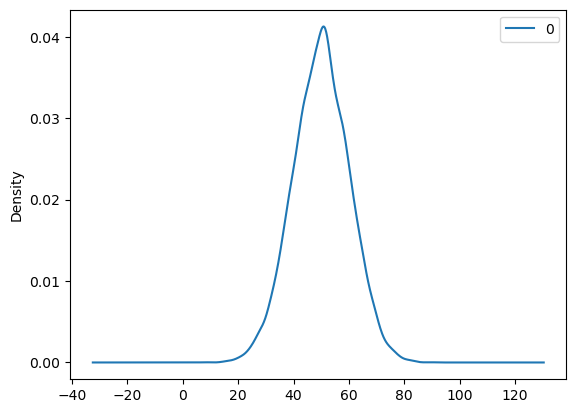

In [11]:
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

population = np.random.normal(50, 10, 10000)      #평균, 표준편차, 데이터 사이즈
pd.DataFrame(population).plot(kind = 'kde')

### 2. 모집단으로부터 샘플링을 한다.
이때 각 샘플들의 신뢰구간의 차이를 확인해 볼 수 있게 샘플의 크기를 다르게 함.
np.random.choice(데이터, 뽑을 횟수) 넘파이 함수를 이용

In [12]:
#샘플링 횟수: 5 ,10, 20, 50, 100, 500, 1000회 지정
sampling_n = [5, 10, 20, 50, 100, 500, 1000]
samples = []            #각 샘플이 담길 리스트

#샘플링 시작
for i in sampling_n:
    sample = np.random.choice(population, i)
    samples.append(sample)

### 3. 각 샘플들의 신뢰구간 측정한다.
신뢰구간 측정을 위해 scipy.stats의 t.interval(신뢰도, 자유도, loc = 샘플 평균, scale = 샘플표준오차) 함수를 사용

23.59511054413776 65.08529055067365


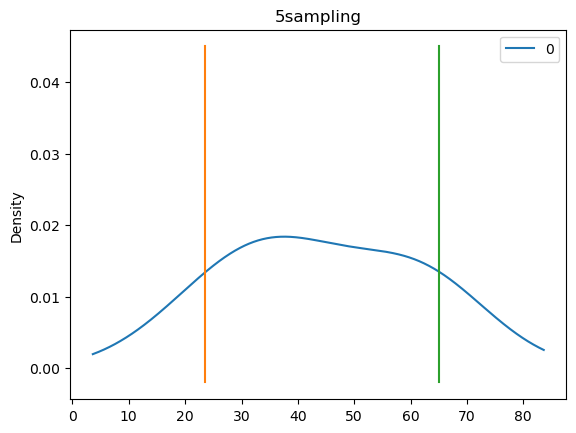


41.73785426515819 60.09007515920261


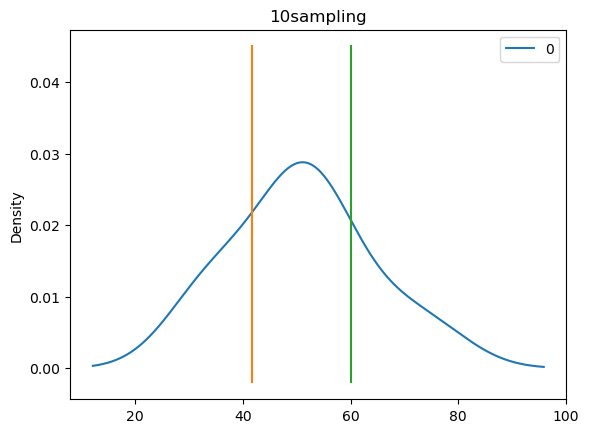


42.29574195964134 49.42404232684218


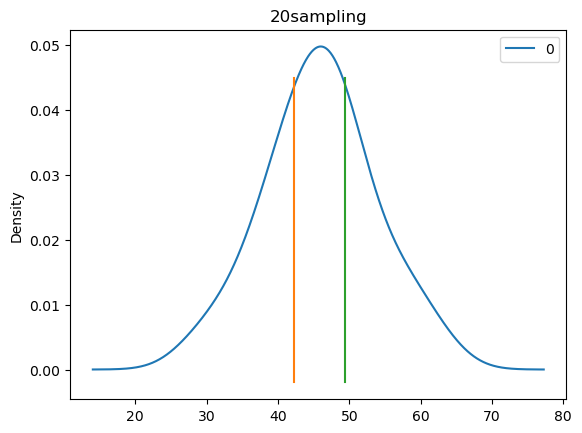


50.11146758182843 55.001923513319404


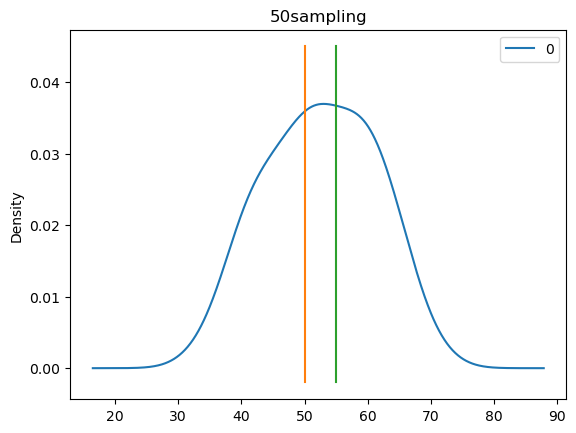


48.29774550741298 52.6771156786123


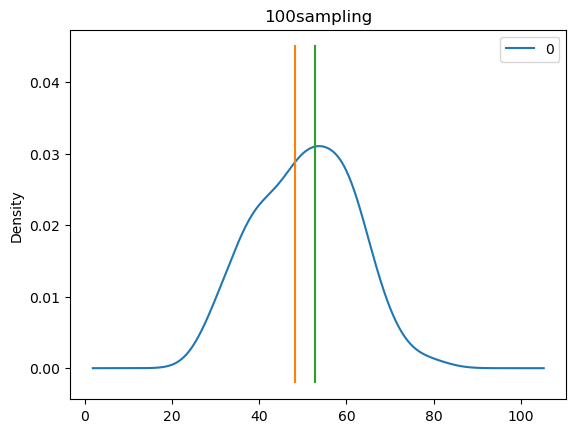


49.45266913203958 51.20694073145575


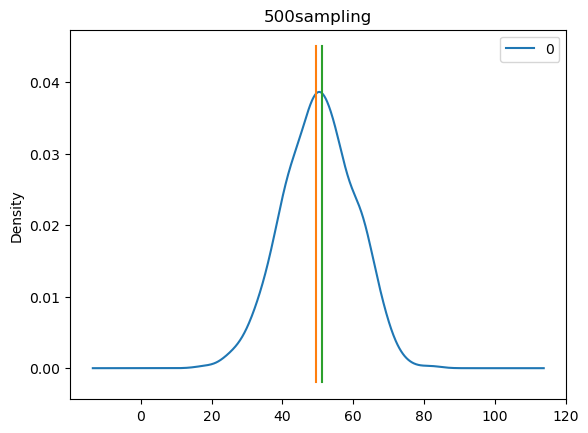


49.33108972766947 50.60238729185807


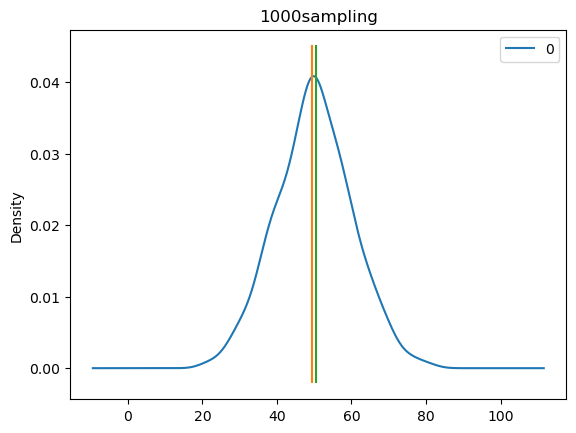

In [14]:
from scipy.stats import t

#각 샘플에 대한 신뢰구간 측정
for i, sample in enumerate(samples):
    n = len(sample)    #샘플 사이즈
    dof = n - 1        #자유도(degree of freedom: 총 관측치 - 1)
    sample_mean = np.mean(sample)         #표본 평균
    sample_std = np.std(sample, ddof = 1) #표본 표준편차
    sample_std_error = sample_std / n ** 0.5        #표본 표준오차 = 표준편차 / √샘플사이즈
    
    ##신뢰구간 : stats.t.interval()
    CI_min, CI_max = t.interval(.95, dof, loc = sample_mean, scale = sample_std_error)
    print(CI_min, CI_max)
    
    #시각화
    ax = pd.DataFrame(sample).plot(kind = "kde")
    ax.plot([CI_min, CI_min], [-0.002, 0.045])
    ax.plot([CI_max, CI_max], [-0.002, 0.045])
    plt.title("{}sampling".format(sampling_n[i]))
    plt.show()
    print()

결과로 알 수 있는 점
- 샘플의 사이즈가 커질수록 모집단의 분포와 비슷해지는 것을 볼 수 있었음
- 또한 신뢰구간을 95%로 설정했을 경우, 샘플의 사이즈가 커지면 신뢰구간이 점점 좁아지는 것을 확인할 수 있음

> #### 6장의 중심 극한의 정리 Central limit theorem
 : 독립적인 확률 변수들의 합 또는 평균이 정규 분포에 근사하는 현상 <br>
    - "독립적이고 동일한 분포를 가진 확률 변수들의 합 또는 평균의 표본 크기가 충분히 크다면, 이들의 분포는 정규 분포에 근사하게 됩니다"<br>
    - 모집단의 분포에 상관없이 원리가 작용함 <br>
    - 통계학에서 많은 추론 기법과 가설 검정에 사용됨<br>
    - 작은 표본 크기에서부터 추론을 확장하고 모집단에 대한 더 정확한 추정과 예측을 할 수 있음    <br>

- 중심 극한 정리는 표본의 크기가 충분히 크다면 표본 평균의 분포가 정규분포에 근사한다는 원리를 나타낸다.
- 이를 통해 정규 분포의 특성을 활용하여 표본 평균에 대한 신뢰구간을 계산할 수 있게 됨.
- 위 코드에 대해 연관지어 설명
    - np.random.normal() 함수를 사용하여 정규분포를 따르는 모집단 데이터 생성
    - 표본을 생성하고, 각 표본에 대해 신뢰구간을 계산하여 그래프로 표현
    - 중심 극한 정리에 의해 각 표본의 평균 분포는 모집단의 평균을 중심으로 하고 표준 오차가 population_std / sqrt(sample_size)인 정규 분포를 따르게 됨
    - 이러한 정규분포를 이용하여 표본 평균에 대한 95% 신뢰구간을 계산하여 그래프로 나타냄
    - 이로 인해 모집단 평균이 신뢰구간 안에 있을 확률이 95%임을 확인할 수 있음

#### 신뢰구간을 97%로 하였을 때

19.700914370099976 68.97948672471142


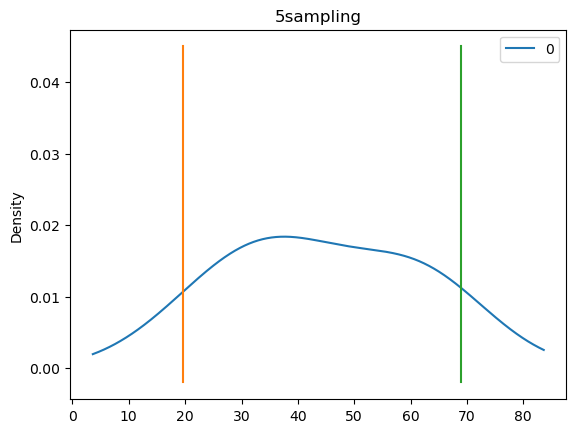


40.473704436696096 61.35422498766471


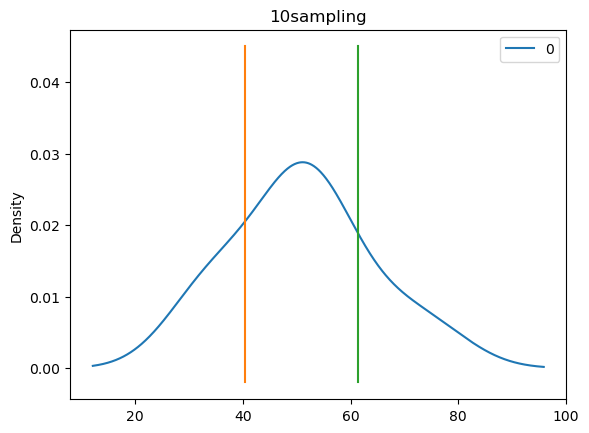


41.86555673663231 49.85422754985121


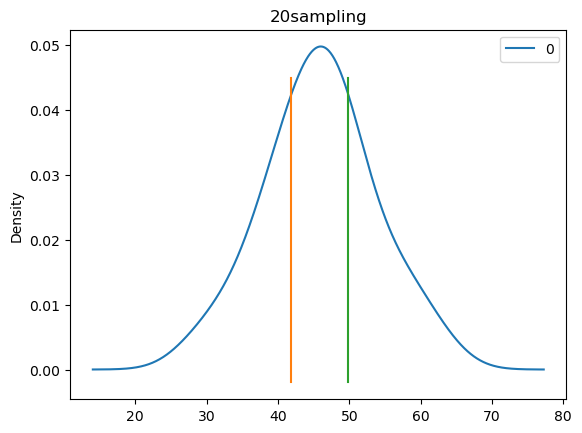


49.83702285685225 55.27636823829558


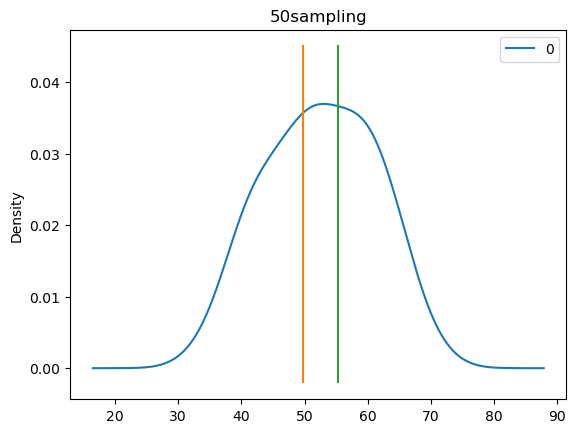


48.057610941020904 52.917250245004375


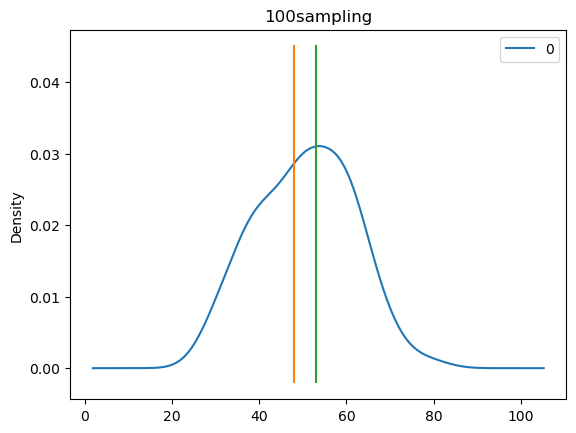


49.35820870408877 51.301401159406566


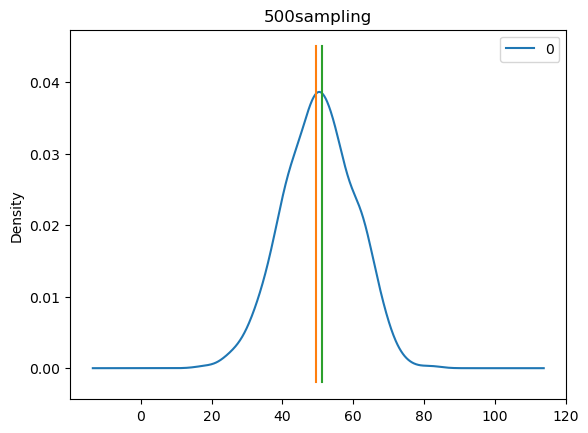


49.26278922139147 50.67068779813607


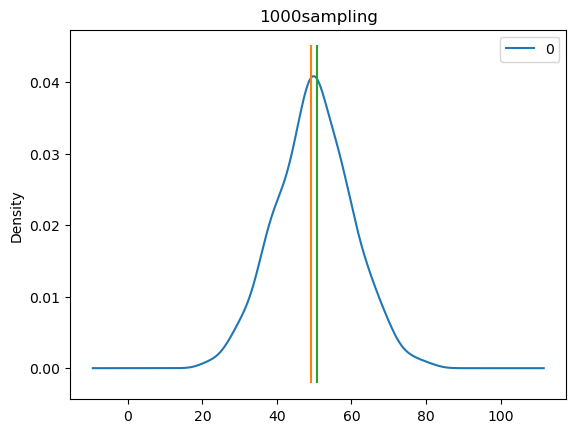

In [15]:
from scipy.stats import t

#각 샘플에 대한 신뢰구간 측정
for i, sample in enumerate(samples):
    n = len(sample)    #샘플 사이즈
    dof = n - 1        #자유도(degree of freedom: 총 관측치 - 1)
    sample_mean = np.mean(sample)         #표본 평균
    sample_std = np.std(sample, ddof = 1) #표본 표준편차
    sample_std_error = sample_std / n ** 0.5        #표본 표준오차 = 표준편차 / √샘플사이즈
    
    ##신뢰구간 : stats.t.interval()
    CI_min, CI_max = t.interval(.97, dof, loc = sample_mean, scale = sample_std_error)
    print(CI_min, CI_max)
    
    #시각화
    ax = pd.DataFrame(sample).plot(kind = "kde")
    ax.plot([CI_min, CI_min], [-0.002, 0.045])
    ax.plot([CI_max, CI_max], [-0.002, 0.045])
    plt.title("{}sampling".format(sampling_n[i]))
    plt.show()
    print()

##### 신뢰구간이 95%일 때와 97%일 때의 차이
- 95%일 때보다 97%일 때 데이터의 불확실성이 커지며, 표본 평균에 대한 변동폭이 상대적으로 넓어짐.
> 신뢰구간이 커질수록 데이터의 불확실성이 더 커지며, 표본 평균 추정치의 정확성이 낮아짐

### 균일 분포의 신뢰구간

32.835133799142305 118.93843372069142


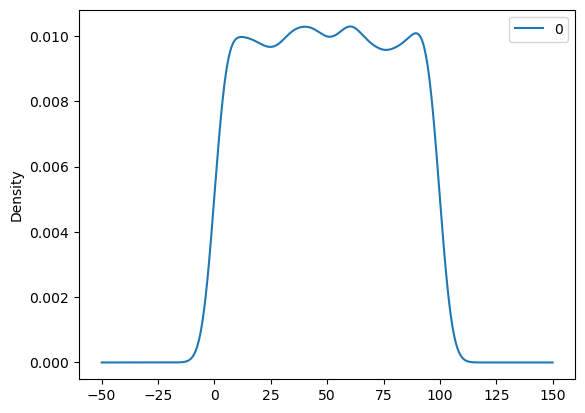

<Figure size 1000x600 with 0 Axes>

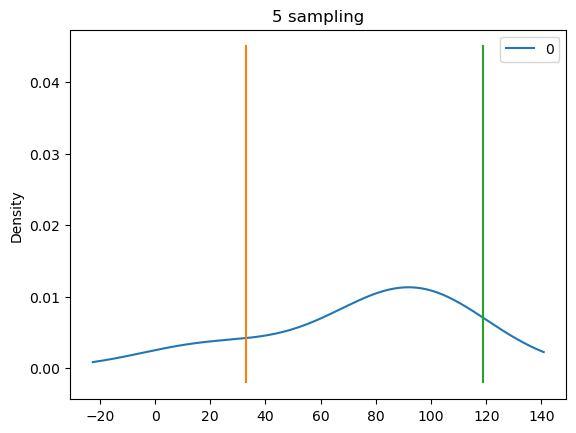


44.448555150436775 61.04727426193726


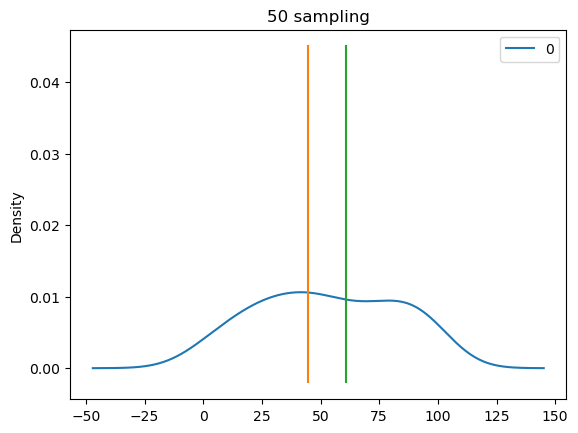


41.61217645518875 53.08862013665448


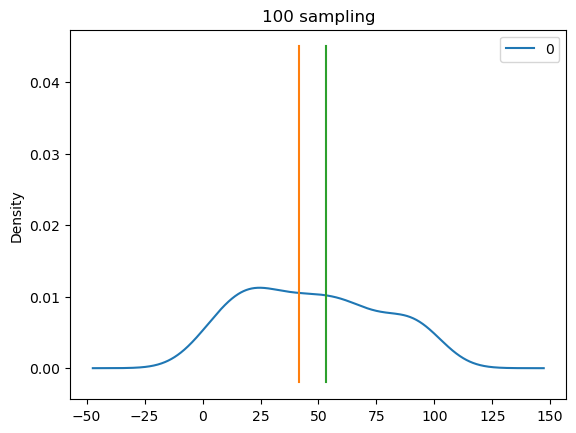


49.0942028035194 54.23329518758181


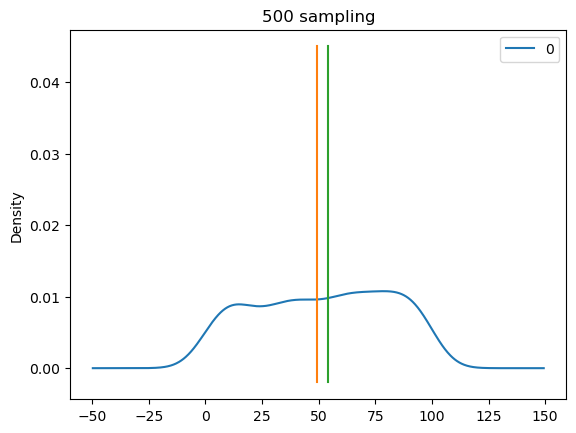


48.531426815353896 52.12017090225237


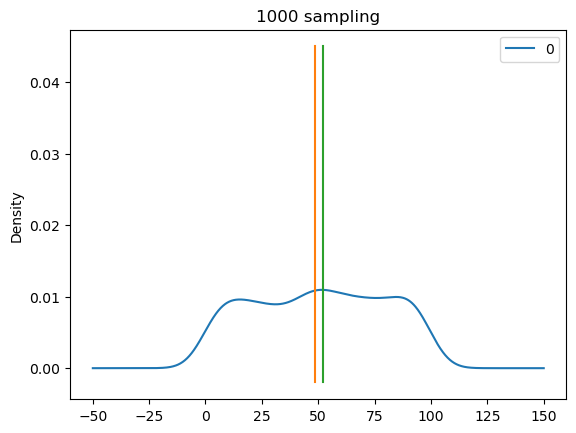

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 균일분포에서의 최솟값과 최댓값 지정
min_value = 0
max_value = 100

# 균일분포로부터 표본 데이터 생성
population = np.random.uniform(min_value, max_value, 10000)
pd.DataFrame(population).plot(kind='kde')

# 샘플링 횟수 지정
sampling_n = [5, 50, 100, 500, 1000]
samples = []  # 각 샘플이 담길 리스트

# 그래프 사이즈 설정
plt.figure(figsize=(10, 6))

# 샘플링 시작
for i in sampling_n:
    sample = np.random.choice(population, i)
    samples.append(sample)

from scipy.stats import t

# 각 샘플에 대한 신뢰구간 측정
for i, sample in enumerate(samples):
    n = len(sample)    # 샘플 사이즈
    dof = n - 1        # 자유도(degree of freedom: 총 관측치 - 1)
    sample_mean = np.mean(sample)         # 표본 평균
    sample_std = np.std(sample, ddof=1)   # 표본 표준편차
    sample_std_error = sample_std / n ** 0.5        # 표본 표준오차 = 표준편차 / √샘플사이즈

    # 신뢰구간 : stats.t.interval()
    CI_min, CI_max = t.interval(0.95, dof, loc=sample_mean, scale=sample_std_error)
    print(CI_min, CI_max)

    # 시각화
    ax = pd.DataFrame(sample).plot(kind="kde")
    ax.plot([CI_min, CI_min], [-0.002, 0.045])
    ax.plot([CI_max, CI_max], [-0.002, 0.045])
    plt.title("{} sampling".format(sampling_n[i]))
    plt.show()
    print()

- 'np.random.uniform()'함수를 사용하여 균일 분포 생성
- 샘플링과 신뢰구간 계산 및 시각화 부분은 정규분포의 코드와 동일

### 지수 분포의 신뢰 구간

-4.886247749774 23.550312997833306


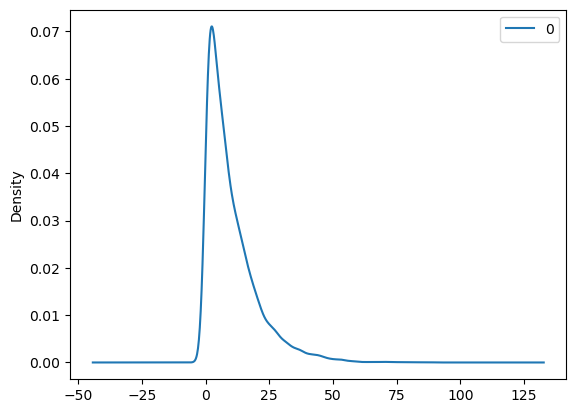

<Figure size 1000x600 with 0 Axes>

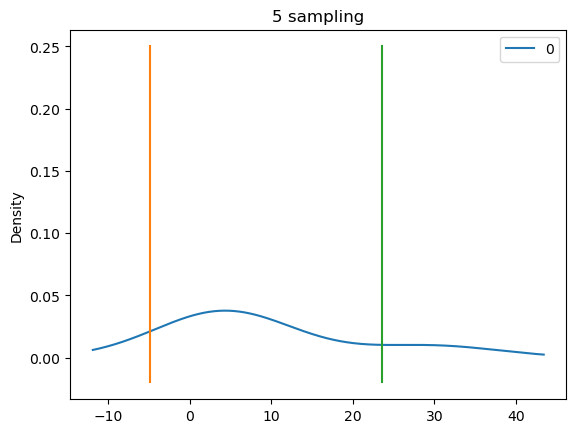


7.403812969375995 12.811756411637614


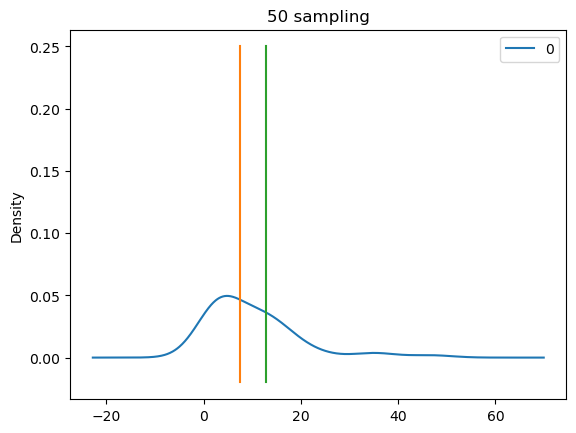


8.063312889595618 12.385695828851162


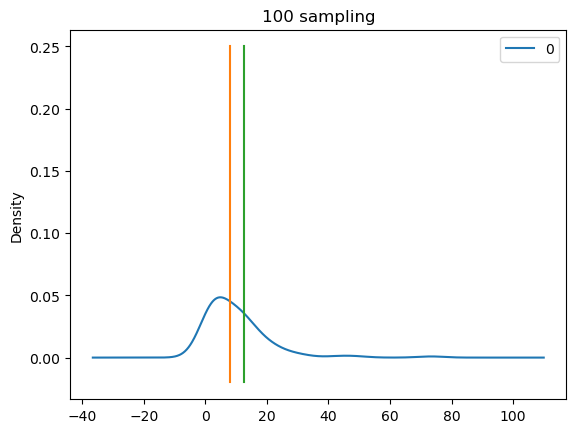


10.440704378350564 12.375673381710325


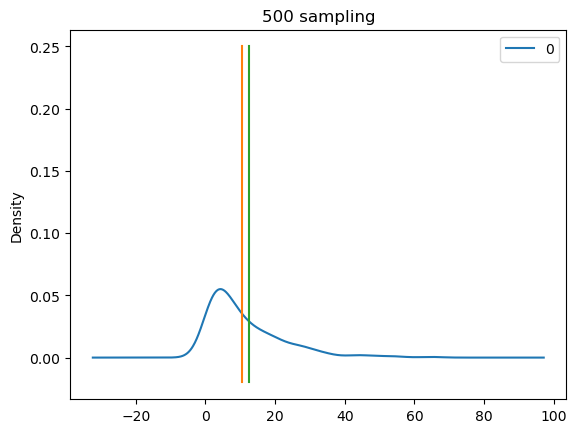


9.81421827164835 11.107856525342058


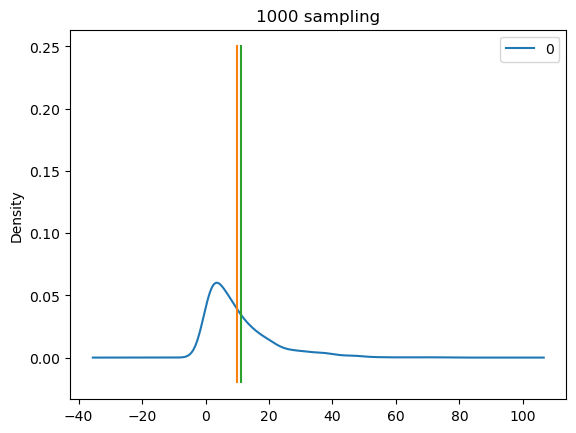

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 지수분포에서의 평균 지정
mean_value = 10

# 지수분포로부터 표본 데이터 생성
population = np.random.exponential(mean_value, 10000)
pd.DataFrame(population).plot(kind='kde')

# 샘플링 횟수 지정
sampling_n = [5, 50, 100, 500, 1000]
samples = []  # 각 샘플이 담길 리스트

# 그래프 사이즈 설정
plt.figure(figsize=(10, 6))

# 샘플링 시작
for i in sampling_n:
    sample = np.random.choice(population, i)
    samples.append(sample)

from scipy.stats import t

# 각 샘플에 대한 신뢰구간 측정
for i, sample in enumerate(samples):
    n = len(sample)    # 샘플 사이즈
    dof = n - 1        # 자유도(degree of freedom: 총 관측치 - 1)
    sample_mean = np.mean(sample)         # 표본 평균
    sample_std = np.std(sample, ddof=1)   # 표본 표준편차
    sample_std_error = sample_std / n ** 0.5        # 표본 표준오차 = 표준편차 / √샘플사이즈

    # 신뢰구간 : stats.t.interval()
    CI_min, CI_max = t.interval(0.95, dof, loc=sample_mean, scale=sample_std_error)
    print(CI_min, CI_max)

    # 시각화
    ax = pd.DataFrame(sample).plot(kind="kde")
    ax.plot([CI_min, CI_min], [-0.02, 0.25])
    ax.plot([CI_max, CI_max], [-0.02, 0.25])
    plt.title("{} sampling".format(sampling_n[i]))
    plt.show()
    print()

- np.random.expoential()' 함수를 사용
- 중심 극한 정리에 따라 표본의 크기가 충분히 크다면 표본 평균의 분포에 근사할 것이므로, 지수 분포에 대해서도 정규 분포의 't.interval()' 함수를 사용하여 표본 평균에대한 신뢰구간을 계산할 수 있음

### 감마 분포의 신뢰구간

-1.2930194847408476 19.671569072011202


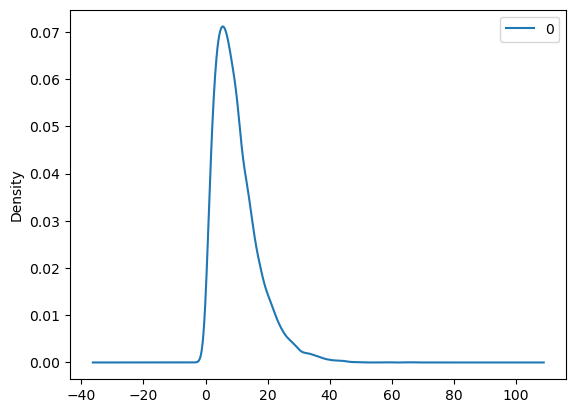

<Figure size 1000x600 with 0 Axes>

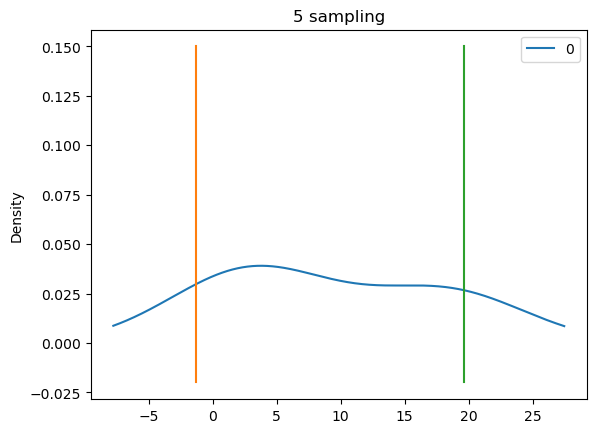


7.668309862154838 11.184680771957852


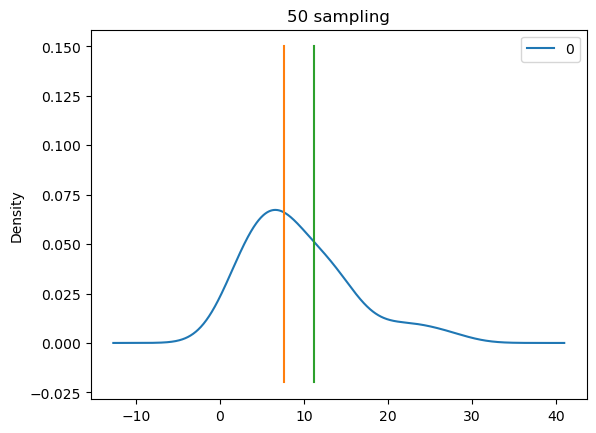


8.377589260147655 11.072154936606513


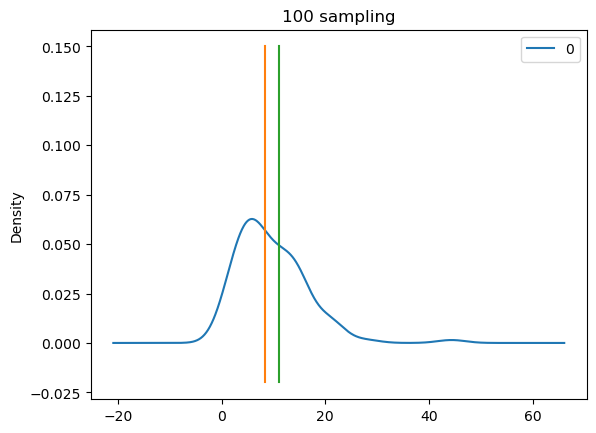


9.01737543405986 10.19190044318355


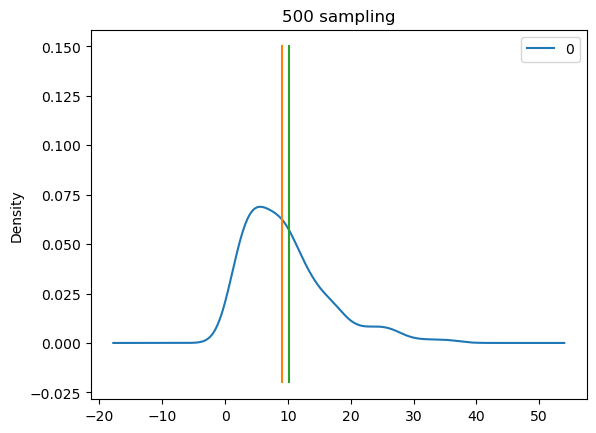


9.369131627368509 10.230359623712252


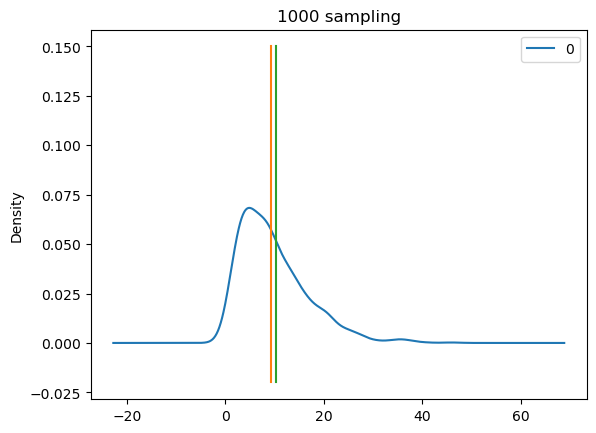

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 감마 분포에서의 shape와 scale 지정
shape_param = 2
scale_param = 5

# 감마 분포로부터 표본 데이터 생성
population = np.random.gamma(shape_param, scale_param, 10000)
pd.DataFrame(population).plot(kind='kde')

# 샘플링 횟수 지정
sampling_n = [5, 50, 100, 500, 1000]
samples = []  # 각 샘플이 담길 리스트

# 그래프 사이즈 설정
plt.figure(figsize=(10, 6))

# 샘플링 시작
for i in sampling_n:
    sample = np.random.choice(population, i)
    samples.append(sample)

from scipy.stats import t

# 각 샘플에 대한 신뢰구간 측정
for i, sample in enumerate(samples):
    n = len(sample)    # 샘플 사이즈
    dof = n - 1        # 자유도(degree of freedom: 총 관측치 - 1)
    sample_mean = np.mean(sample)         # 표본 평균
    sample_std = np.std(sample, ddof=1)   # 표본 표준편차
    sample_std_error = sample_std / n ** 0.5        # 표본 표준오차 = 표준편차 / √샘플사이즈

    # 신뢰구간 : stats.t.interval()
    CI_min, CI_max = t.interval(0.95, dof, loc=sample_mean, scale=sample_std_error)
    print(CI_min, CI_max)

    # 시각화
    ax = pd.DataFrame(sample).plot(kind="kde")
    ax.plot([CI_min, CI_min], [-0.02, 0.15])
    ax.plot([CI_max, CI_max], [-0.02, 0.15])
    plt.title("{} sampling".format(sampling_n[i]))
    plt.show()
    print()

- 'np.random.gamma()' 함수를 사용하여 감마 분포 생성

### 베타 분포의 신뢰구간

0.0744003764367463 0.4372154970195096


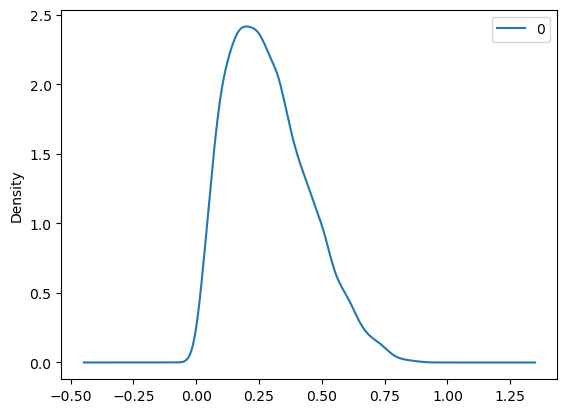

<Figure size 1000x600 with 0 Axes>

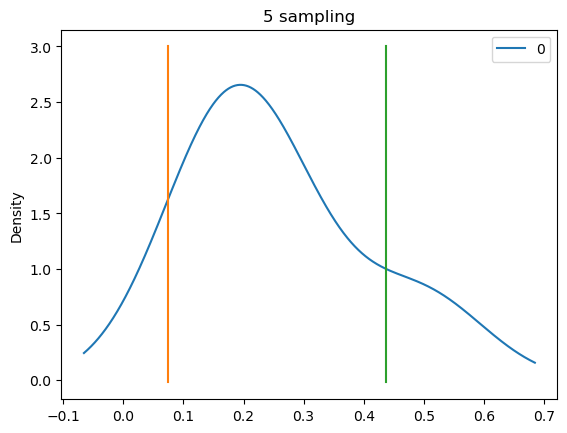


0.23543403226221365 0.33117213755537084


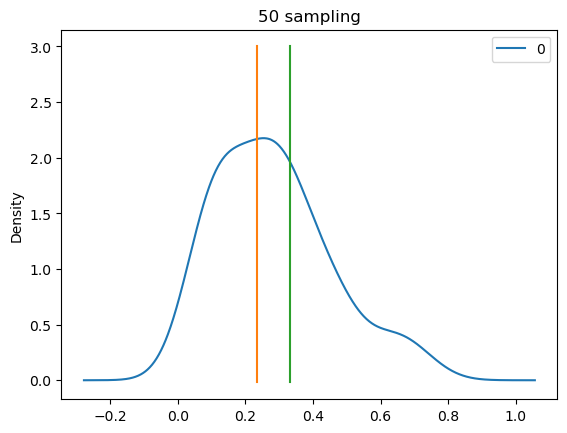


0.252521748028202 0.3140155729562441


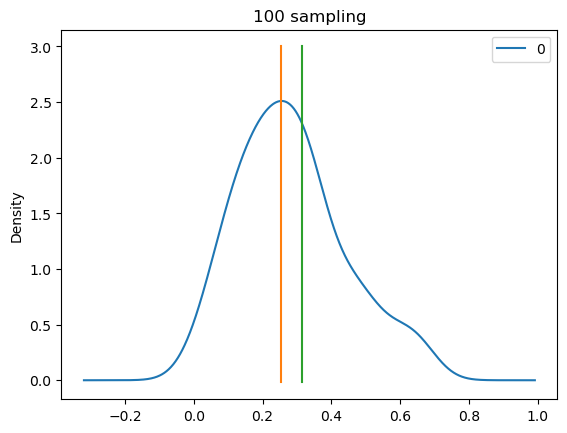


0.2652859695337579 0.29357892444448214


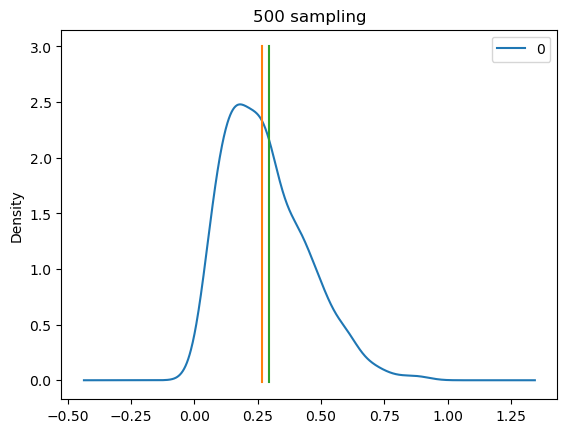


0.2707545016035099 0.29031857079615864


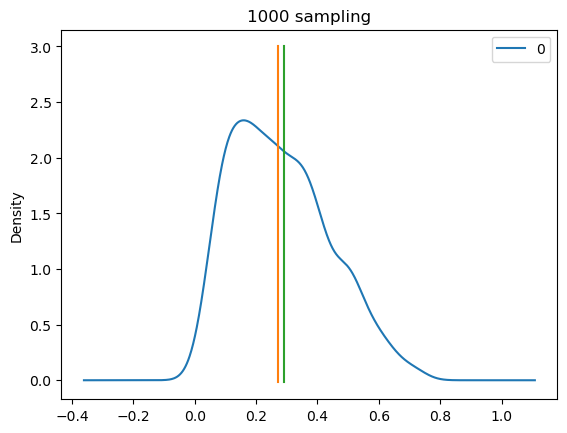

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 베타 분포에서의 shape1과 shape2 지정
shape1_param = 2
shape2_param = 5

# 베타 분포로부터 표본 데이터 생성
population = np.random.beta(shape1_param, shape2_param, 10000)
pd.DataFrame(population).plot(kind='kde')

# 샘플링 횟수 지정
sampling_n = [5, 50, 100, 500, 1000]
samples = []  # 각 샘플이 담길 리스트

# 그래프 사이즈 설정
plt.figure(figsize=(10, 6))

# 샘플링 시작
for i in sampling_n:
    sample = np.random.choice(population, i)
    samples.append(sample)

from scipy.stats import t

# 각 샘플에 대한 신뢰구간 측정
for i, sample in enumerate(samples):
    n = len(sample)    # 샘플 사이즈
    dof = n - 1        # 자유도(degree of freedom: 총 관측치 - 1)
    sample_mean = np.mean(sample)         # 표본 평균
    sample_std = np.std(sample, ddof=1)   # 표본 표준편차
    sample_std_error = sample_std / n ** 0.5        # 표본 표준오차 = 표준편차 / √샘플사이즈

    # 신뢰구간 : stats.t.interval()
    CI_min, CI_max = t.interval(0.95, dof, loc=sample_mean, scale=sample_std_error)
    print(CI_min, CI_max)

    # 시각화
    ax = pd.DataFrame(sample).plot(kind="kde")
    ax.plot([CI_min, CI_min], [-0.02, 3])
    ax.plot([CI_max, CI_max], [-0.02, 3])
    plt.title("{} sampling".format(sampling_n[i]))
    plt.show()
    print()

### P-Hacking
- 유의한 통계 수준(P<0.05)를 얻기 위해서, 데이터 획득 과정에서 임의로 멈추거나 데이터 분석 방법을 임의대로 다양하게 변화시키거나, 혹은 데이터 구조를 변화시키는 것
- 통계적 가설 검정을 사용하여 실험 결과를 왜곡하는 것
    - 결과를 왜곡하거나 잘못된 결론을 도출하는 데 사용될 수 있으며, 과학적인 연구나 데이터 분석에서 심각한 문제가 될 수 있음
- 일반적으로 가설 검정은 통계적으로 유의미한 결과를 얻기 위해 실험을 설계하고 데이터를 수집하는 과정을 포함함
- 악의적으로 특정 가설이나 결과를 얻기 위해 데이터를 조작하거나 선택적으로 분석하여 원하는 결과를 도출하려는 시도는 신뢰성 있는 연구를 손상시키고 비용이 많이 들어가는 착취적인 행위로 간주

- ex)
    - 100개의 표본을 수집했고 귀무가설을 세웠다. P-value 값이 0.06 정도의 값이 나왔다. 표본을 살펴보니 기대치를 많이 벗어나는 데이터 몇 가지가 눈에 들어와서 10개의 표본을 삭제한다. 90개의 표본으로 P-value를 계산하니 0.05 이하로 통계적 유의성을 보였다. 논문의 데이터 개수를 수정하여 원하는 결과값을 제출한다.
    
- 이 예시는 연구 부정행위라고 판단할 수 있는가?
    - 연구 부정행위의 범주
        1) 없는 데이터를 만듦
        2) 있는 데이터를 고침
        3) 남의 데이터나 생각을 자신의 것이라 속이는 경우
    - 이 세 가지로 한정되어 있으므로 이 예시는 부정행위가 아니다.
- p-해킹을 방지하기 위한 방법
     - 데이터 수집과 분석을 투명하고 통제된 방법으로 수행하고, 사전에 계획된 가설 검정 절차를 따라야 함.
     - 또한 연구 결과의 재현성을 확인하기 위해 다른 연구자들이 동일한 실험을 반복할 수 있도록 데이터와 방법을 공개해야 함
         - 이런 과정을 거치면 신뢰성 있는 연구를 수행하고 결과를 해석하는 데 과학적인 근거를 제공할 수 있음

#### 통계적 가설 검정에서 상관 관계와 p-해킹의 차이점

- 상관 관계
    - 변수 간의 관련성을 측정하는 데 사용되며, 통계적 가설 검정은 데이터를 사용하여 가설을 검증하는 데 사용
- p-해킹
    - 통계적 가설 검정을 악의적으로 사용하여 결과를 왜곡하는 행위

#### 데이터 준설(Data dredging)과 p-해킹
: 비슷한 개념으로서 통계적 검정의 결과를 왜곡하거나 잘못된 결론을 도출하기 위해 데이터를 부정확하게 사용하는 행위임

- 데이터 준설(Data dredging 또는 Data mining)
    - 데이터 준설은 데이터를 통해 결과를 얻기 위해 여러 가설들을 시험하고, 통계적으로 유의미한 결과를 얻을 수 있는 가설들을 선택하는 행위
    - 대부분의 가설들이 사실상 의미 없는 랜덤한 결과이지만, 그 중에서 일부 가설들은 통계적으로 유의미한 결과로 나타날 수 있음.
    - 무작위로 여러 실험을 반복하는 것과 유사한 결과를 낳을 수 있음
- p-해킹(P-hacking 또는 Data fishing)
    - 통계적 가설 검정의 결과를 왜곡하거나 연구 결과를 조사하기 위해 실험 조건을 바꾸거나 여러 가설을 시험하여 원하는 결과를 얻는 행위
- 둘의 차이점
    - 데이터 준설: 여러 가설을 테스트하여 유의미한 결과를 찾으려는 것에 초점
    - p-해킹: p-값을 조작하여 유의미한 결과를 얻으려는 것에 초점

### A/B 테스트
: 두 가지 콘텐츠를 비교하여 방문자/뷰어가 더 높은 관심을 보이는 버전을 확인

#### A/B 테스트 단계
1. 문제 정의: 개선하고자 하는 목표를 설정하고, 어떤 변형들을 비교할 것인지 결정함
2. 분할: 사용자들을 두 개의 그룹으로 랜덤하게 분할. 그룹 A는 제어 그룹으로 기존의 변형(혹은 현재 진행 중인 것)을 보여 주고, 그룹 B는 실험 그룹으로 새로운 변형을 보여 줌
3. 실험: 두 그룹에 대해 각각 다른 변형을 노출시키고, 사용자들의 반응과 결과를 측정
4. 결과 분석: 두 그룹의 결과를 비교하여 어느 변형이 더 우수한 결과를 보였는지를 통계적으로 분석
5. 결론 도출: 통계적 분석 결과를 바탕으로 어떤 변형을 선택할지 결정

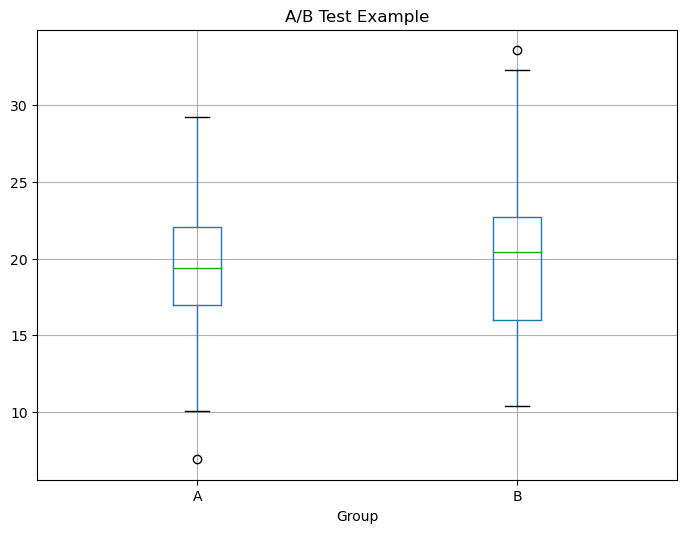

T-검정 결과:
T-statistic: -0.957931943761843
p-value: 0.3392652865361563
유의미한 차이가 없습니다. 제어 그룹과 실험 그룹은 유사합니다.


In [31]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

#가상의 데이터 생성
np.random.seed(42)

#제어 그룹(Group A) 데이터 생성
group_a = np.random.normal(loc = 20, scale = 5, size = 100)

#실험 그룹(Group B) 데이터 생성
group_b = np.random.normal(loc = 20, scale = 5, size = 100)

#데이터 결합
data = pd.DataFrame({'Group': ['A']*100 + ['B']*100, "Value": np.concatenate([group_a, group_b])})

#그룹별로 데이터 시각화
plt.figure(figsize = (8, 6))
ax = plt.gca()
data.boxplot(column = "Value", by = 'Group', ax = ax)
plt.title('A/B Test Example')
plt.suptitle('')
plt.show()

#t-검정을 통한 그룹 간 평균 비교
result = stats.ttest_ind(group_a, group_b)
print('T-검정 결과:')
print('T-statistic:', result.statistic)
print('p-value:', result.pvalue)

#p-value에 따른 결과 해석
alpha = 0.05
if result.pvalue < alpha:
    print("유의미한 차이가 있습니다. 실험 그룹이 더 우수합니다")
else:
    print("유의미한 차이가 없습니다. 제어 그룹과 실험 그룹은 유사합니다.")

위 코드에서는 가상 데이터를 생성하여 제어 그룹(A)과 실험 그룹(B)의 결과를 비교하고, t-검정을 사용하여 두 그룹의 평균을 비교.
p-value를 확인하여 유의미한 차이가 있는지 없는지를 판단.

### 베이지안 추론 Bayesian inference
:확률론적인 통계적 기법으로, 사전 지식과 관측 데이터를 바탕으로 불확실성을 모델링하고 업데이트하는 방법

- 베이즈 정리(사전확률로부터 사후확률을 구할 수 있다)의 기반으로 함
- 베이지안 추론의 기본 개념
    - 사전 확률(Prior Probability): 사전 지식이나 경험에 따라 얻은 초기 밈ㄷ음을 나타내는 확률. 관측 데이터를 고려하기 전에 얻는 확률
    - 가능도 함수(Likelihood Function): 관측 데이터가 주어졌을 때, 모수(파라미터)가 주어진 데이터를 생성할 수 있는 확률. 이를 모델링하고자 하는 확률 분포를 나타냄
    - 사후 확률(Posterior Probability): 관측 데이터가 주어진 상태에서의 모수의 확률 분포. 사전 확률과 가능도 함수를 이용하여 업데이트된 확률
- 이러한 사전 지식과 관측 데이터를 결합하여 모수(파라미터)의 불확실성을 줄이고, 모델을 보다 정확하게 업데이트하는 데 사용
- 새로운 데이터를 관측할 때마다 모델을 업데이트하고 새로운 사후 확률을 계산할 수 있다는 장점이 있음

<br>

▼ 철도 회사에서 한 열차의 지연 시간을 예측하는 문제

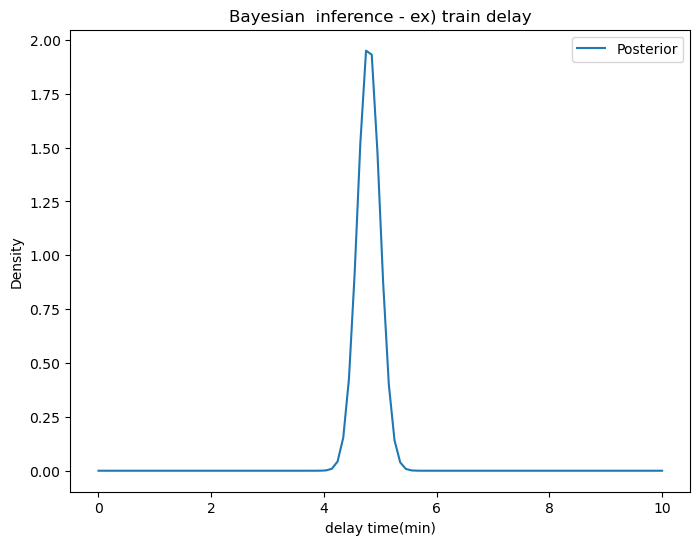

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#열차 지연 시간 데이터 생성
np.random.seed(42)
train_delays = np.random.normal(loc = 5, scale = 2, size = 100)

#사전 확률: 평균 5분, 표준편차 2분을 따르는 정규 분포로 표현
prior_mean = 5
prior_std = 2

#데이터에 따른 사후 확률 계산
posterior_mean = (prior_mean * (1 / prior_std ** 2) + np.sum(train_delays) * (1 / 2 ** 2)) / (1 / prior_std ** 2 + len(train_delays) * (1/ 2 ** 2))
posterior_std = np.sqrt(1 / (1 / prior_std ** 2 + len(train_delays) * (1 / 2 ** 2)))

#사후 확률 분포 그래프
x = np.linspace(0, 10, 100)
posterior = stats.norm(posterior_mean, posterior_std).pdf(x)

#결과 출력
plt.figure(figsize = (8, 6))
plt.plot(x, posterior, label = 'Posterior')
plt.xlabel('delay time(min)')
plt.ylabel('Density')
plt.title('Bayesian  inference - ex) train delay')
plt.legend()
plt.show()

### 의사 결정 이론 Decision theory
: 불확실한 상황에서 최선의 결정을 내리는 방법을 연구하는 이론
- 확률적인 상태와 가능한 행동들을 고려하여 최적의 결정을 내리는 방법을 다룸
- 의사 결정 이론의 기본 개념
    - 상태(state): 확률적으로 변할 수 있는 상황이나 조건
    - 행동(Action): 의사 결정을 내리는 데에 가능한 선택지나 행동
    - 결과(Outcome): 상태와 행동에 따라 발생하는 결과
    - 유틸리티(Utility): 결과의 가치나 만족도 / 의사결정을 내리는 데 기준이 됨
- 주어진 상태와 행동에 따라 어떤 결과가 발생하고, 각 결과에 어떤 유틸리티가 연결되어 있는지를 고려하여 최선의 행동을 선택하는 것이 핵심

<br>

▼ 주사위 게임 예제

In [54]:
import numpy as np

#주사위 게임 데이터 생성
np.random.seed(42)
num_games = 100
win_reward = 10
lose_penalty = -5

#의사 결정: 주사위를 던지는 행동
actions = [1, 2, 3, 4, 5, 6]

#의사 결정 이론 함수
def decision_theory(game_results, actions):
    expected_rewards = []
    for action in actions:
        rewards = [result[action - 1] for result in game_results]
        expected_reward = np.mean(rewards)
        expected_rewards.append(expected_reward)
    return actions[np.argmax(expected_rewards)]

# 게임 결과 생성
game_results = np.random.randint(1, 7, size = (num_games, 6))

#의사 결정 이론 적용
best_action = decision_theory(game_results, actions)
print("최적의 행동 : {}".format(best_action))

최적의 행동 : 6


주사위를 던지는 주사위 게임 데이터를 생성하고, 의사 결정 이론을 적용하여 최적의 행동을 선택. 주사위를 던지는 행동 중에서 기대 보상이 가장 높은 행동 선택하게 됨.